In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy import stats
from sklearn import linear_model

import warnings
warnings.filterwarnings("ignore")

In [17]:
#Import Data
fp = "./Downloads/coffeedata.csv"
data = pd.read_csv(fp)
data.head()

,CupperPoints,ID,Country,HarvestYear,Variety,Process,Aroma,Flavor,Aftertaste,Acidity,...,MeanAlt,Address,Contact,Elevation,FullElevation,Precipitation,Temperature,Continent,NSHem,EWHem
0,10.00,263,Taiwan,2012,Unknown,Unknown,7.00,7.08,7.00,7.17,...,Unknown,10,10,1150.0,1150.0,2500.0,16.00,Asia,N,E
1,10.00,267,Taiwan,2012,Unknown,Unknown,7.25,7.25,7.00,7.08,...,200,10,10,1150.0,200.0,2500.0,16.00,Asia,N,E
2,10.00,277,Taiwan,2013,Unknown,Unknown,7.67,7.67,7.00,7.08,...,Unknown,10,10,1150.0,1150.0,2500.0,16.00,Asia,N,E
3,10.00,278,Taiwan,2012,Unknown,Unknown,7.58,7.58,7.17,7.17,...,Unknown,10,10,1150.0,1150.0,2500.0,16.00,Asia,N,E
4,9.25,1096,Guatemala,2010,Bourbon,Unknown,8.42,8.50,8.42,8.42,...,1700,2,2,759.0,1700.0,1996.0,23.45,North America,N,W


In [18]:
df = pd.DataFrame(data)

df['Process']=pd.Categorical(df['Process'])
dfProcessDummies = pd.get_dummies(df['Process'], prefix='Process')
df = pd.concat([df,dfProcessDummies],axis=1)

df['Color']=pd.Categorical(df['Color'])
dfColorDummies = pd.get_dummies(df['Process'],prefix='Color')
df = pd.concat([df,dfColorDummies],axis=1)

df['HarvestYear']=pd.Categorical(df['HarvestYear'])
dfHYDummies = pd.get_dummies(df['HarvestYear'],prefix='Year')
df = pd.concat([df,dfHYDummies],axis=1)

df['Variety']=pd.Categorical(df['Variety'])
dfVarDummies = pd.get_dummies(df['Variety'],prefix='Variety')
df = pd.concat([df,dfVarDummies],axis=1)

df['Continent']=pd.Categorical(df['Continent'])
dfContDummies = pd.get_dummies(df['Continent'],prefix='Cont')
df = pd.concat([df,dfContDummies],axis=1)

df['Contact']=pd.Categorical(df['Contact'])
dfContactDummies = pd.get_dummies(df['Contact'],prefix='Contact')
df = pd.concat([df,dfContactDummies],axis=1)

df.drop(['Country','HarvestYear','Variety','Process','Color','Continent','NSHem','EWHem',
         'Contact','Address','Elevation','ID','CupperPoints','MeanAlt'],
        axis=1,inplace=True)

cup = data['CupperPoints']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df, cup, train_size=0.85, random_state=1)

In [36]:
#Available Activation Functions: 'logistic', 'tanh', 'relu'
#learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}
#max_iter = X (How many times to run an analysis and backwards propagation)

In [162]:
mlp = MLPRegressor(activation='identity', solver='lbfgs',verbose=True,hidden_layer_sizes=(500,400,300), max_iter=300)
mlp.fit(X_train.fillna(X_train.mean()),y_train.fillna(y_train.mean()))

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 400, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [163]:
predicted_y = mlp.predict(X_test)
score = mlp.score(X_test,y_test)

In [164]:
score

0.6299838726873883

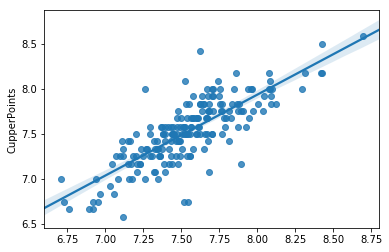

In [166]:
sns.regplot(predicted_y,y_test)